In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import numpy.core.multiarray
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [2]:
par = np.array( ['sigma_dmeff'])
ls_of_mass = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
center = np.array([1e-25])
step = np.array([1e-25])

obs_sigmap = Observables(parameters=par,
                  fiducial=center,
                  left=center-step,
                  right=center+step)

import pickle
premades = pickle.load( (open("../data/premades.p", "rb")) )

# Different Experiments
CMBS4_assumption = CMB_Primary(
    theta_fwhm=[1.5], sigma_T=[1.0], sigma_P=[1.0],
    f_sky=0.4, l_min=300, l_max=2500)

In [5]:
def get_1_sigma_linear(mass_dm_particle, experiment_assumption, model_n, center_n, step_n):   
    par_model = np.array(['sigma_dmeff'])
    center_model = np.array([center_n])
    step_model = np.array([step_n])
    obs_sigmap_n = Observables(parameters=par_model,
                  fiducial=center_model,
                  left=center_model-step_model,
                  right=center_model+step_model)
    classy_template_masses_n = {'omega_cdm':1e-15,
                   'omega_dmeff':0.120,
                   'm_dmeff':mass_dm_particle,
                   'npow_dmeff':model_n,
                   'Vrel_dmeff':0,
                   'dmeff_target': 'baryons',
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes' }
    classy_template_masses_n.update(dict(zip(obs_sigmap_n.parameters, obs_sigmap_n.fiducial)))
    obs_sigmap_n.compute_cosmo(key='fiducial', classy_dict=classy_template_masses_n)
    for par, par_left, par_right in zip(obs_sigmap_n.parameters, obs_sigmap_n.left, obs_sigmap_n.right):
        classy_left_m = classy_template_masses_n.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses_n.copy()
        classy_right_m[par] = par_right
        obs_sigmap_n.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap_n.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    masses_fisher = []
#   masses_fisher = np.sum([exp.get_fisher(obs_sigmap_n, lensed_Cl=True)
#                for exp in premades[experiment_assumption]], axis=0 )[0][0]
    masses_fisher = experiment_assumption.get_fisher(obs_sigmap_n,lensed_Cl=True)[0][0]
    one_sigma = 2*(1/masses_fisher)**(1/2)
    return one_sigma

def get_1_sigma_EFT(mass_dm_particle, experiment_assumption, model_n, center_n, step_n):   
    par_model = np.array(['sigma_dmeff'])
    center_model = np.array([center_n])
    step_model = np.array([step_n])
    obs_sigmap_n = Observables(parameters=par_model,
                  fiducial=center_model,
                  left=center_model-step_model,
                  right=center_model+step_model)
    classy_template_masses_n_EFT = {'N_ncdm':1,
                   'omega_cdm':0,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'omega_cdm':1e-15,
                   'omega_dmeff':0.120,
                   'm_dmeff':mass_dm_particle,
                   'npow_dmeff':model_n,
                   'Vrel_dmeff':0,
                   'dmeff_target': 'baryons',
                   'output': 'mPk tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear':'PT',
                   'IR resummation':'Yes',
                   'Bias tracers':'Yes',
                   'cb':'No',
                   'RSD':'Yes',
                   'AP':'Yes',
                   'Omfid':'0.31'} 
    classy_template_masses_n.update(dict(zip(obs_sigmap_n.parameters, obs_sigmap_n.fiducial)))
    obs_sigmap_n.compute_cosmo(key='fiducial', classy_dict=classy_template_masses_n)
    for par, par_left, par_right in zip(obs_sigmap_n.parameters, obs_sigmap_n.left, obs_sigmap_n.right):
        classy_left_m = classy_template_masses_n.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses_n.copy()
        classy_right_m[par] = par_right
        obs_sigmap_n.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap_n.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    masses_fisher = []
#   masses_fisher = np.sum([exp.get_fisher(obs_sigmap_n, lensed_Cl=True)
#                for exp in premades[experiment_assumption]], axis=0 )[0][0]
    masses_fisher = experiment_assumption.get_fisher(obs_sigmap_n,lensed_Cl=True)[0][0]
    one_sigma = 2*(1/masses_fisher)**(1/2)
    return one_sigma

def get_1_sigma(mass_dm_particle, experiment_assumption, model_n, center_n, step_n):   
    par_model = np.array(['sigma_dmeff'])
    center_model = np.array([center_n])
    step_model = np.array([step_n])
    obs_sigmap_n = Observables(parameters=par_model,
                  fiducial=center_model,
                  left=center_model-step_model,
                  right=center_model+step_model)
    classy_template_masses_n = {'omega_cdm':1e-15,
                   'omega_dmeff':0.120,
                   'm_dmeff':mass_dm_particle,
                   'npow_dmeff':model_n,
                   'Vrel_dmeff':0,
                   'dmeff_target': 'baryons',
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'y' }
    classy_template_masses_n.update(dict(zip(obs_sigmap_n.parameters, obs_sigmap_n.fiducial)))
    obs_sigmap_n.compute_cosmo(key='fiducial', classy_dict=classy_template_masses_n)
    for par, par_left, par_right in zip(obs_sigmap_n.parameters, obs_sigmap_n.left, obs_sigmap_n.right):
        classy_left_m = classy_template_masses_n.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses_n.copy()
        classy_right_m[par] = par_right
        obs_sigmap_n.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap_n.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    masses_fisher = []
    masses_fisher = np.sum([exp.get_fisher(obs_sigmap_n, lensed_Cl=True)
                  for exp in premades[experiment_assumption]], axis=0)[0][0]
#    masses_fisher = experiment_assumption.get_fisher(obs_sigmap)[0][0]
    one_sigma = 2*(1/masses_fisher)**(1/2)
    return one_sigma

In [6]:
CMBS4_masses_inv = []

CMBS4_masses_inv.append(get_1_sigma(1e-5, "S4", 0, 1e-26, 1e-26))
CMBS4_masses_inv.append(get_1_sigma(1e-4, "S4", 0, 1e-26, 1e-26))
CMBS4_masses_inv.append(get_1_sigma(1e-3, "S4", 0, 1e-25, 1e-25))
CMBS4_masses_inv.append(get_1_sigma(1e-2, "S4", 0, 1e-25, 1e-25))
CMBS4_masses_inv.append(get_1_sigma(1e-1, "S4", 0, 1e-25, 1e-25))
CMBS4_masses_inv.append(get_1_sigma(1, "S4", 0, 1e-25, 1e-25))
CMBS4_masses_inv.append(get_1_sigma(10, "S4", 0, 1e-24, 1e-24))
CMBS4_masses_inv.append(get_1_sigma(100, "S4", 0, 1e-22, 1e-22))
CMBS4_masses_inv.append(get_1_sigma(1000, "S4", 0, 1e-22, 1e-22))

CMBS4_masses_inv_linear = []

CMBS4_masses_inv_linear.append(get_1_sigma_linear(1e-5, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1e-4, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1e-3, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1e-2, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1e-1, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(10, CMBS4_assumption, 0, 1e-24, 1e-24))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(100, CMBS4_assumption, 0, 1e-22, 1e-22))
CMBS4_masses_inv_linear.append(get_1_sigma_linear(1000, CMBS4_assumption, 0, 1e-22, 1e-22))

In [7]:
CMBS4_masses_inv_EFT = []

CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1e-5, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1e-4, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1e-3, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1e-2, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1e-1, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1, CMBS4_assumption, 0, 1e-25, 1e-25))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(10, CMBS4_assumption, 0, 1e-24, 1e-24))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(100, CMBS4_assumption, 0, 1e-22, 1e-22))
CMBS4_masses_inv_EFT.append(get_1_sigma_linear(1000, CMBS4_assumption, 0, 1e-22, 1e-22))

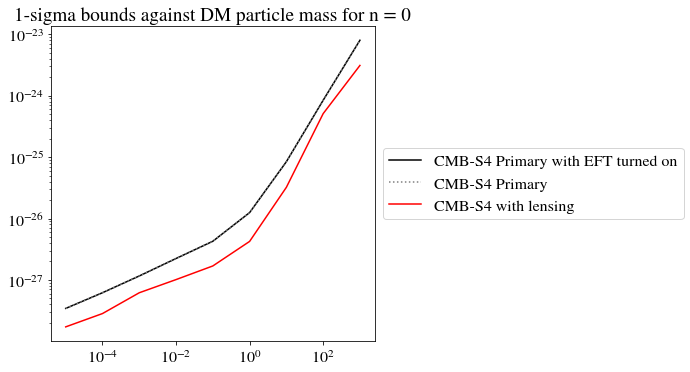

In [12]:
# plot settings fmos
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [5.8,5.8]
# plot it!
plt.figure(1)
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'% Residual in $C_\ell^\mathrm{TT}$')
plt.xscale("log")
plt.yscale("log")
plt.plot(ls_of_mass, CMBS4_masses_inv_EFT, color = 'black', linestyle = '-', label = 'CMB-S4 Primary with EFT turned on')
plt.plot(ls_of_mass, CMBS4_masses_inv_linear, color = 'grey', linestyle = ':', label = 'CMB-S4 Primary')
plt.plot(ls_of_mass, CMBS4_masses_inv, color = 'red', linestyle = '-', label = 'CMB-S4 with lensing')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("1-sigma bounds against DM particle mass for n = 0")
# plt.savefig('fig.3 for linear, eft, and lensing.png',bbox_inches = 'tight')
         # , label = r'$\sigma_\mathrm{p}$')